In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

Ссылка: https://www.kaggle.com/datasets/erdemtaha/cancer-data

Задача классификации: классифицировать наличие или отсутствие рака. Нет - 0 (B), Есть - 1 (M).

Основными характеристиками набора данных являются следующие:

1. id: представляет уникальный идентификатор каждого пациента.

2. diagnosis: указывает на тип рака. Это свойство может принимать значения «M» (злокачественный) или «B» (доброкачественный).

3. radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: представляет собой средние значения визуальных характеристик раковой опухоли.

In [81]:
data = pd.read_csv('Cancer_Data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Анализ данных

Размер датасета

In [82]:
data.shape

(569, 33)

Статистическая информация

In [83]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


Информация о наборе данных

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [85]:
data = data.drop('Unnamed: 32', axis=1)

Выведем название диагнозов

In [86]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Проверим кол-во строк в каждом диагнозе

In [87]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Видим, что диагноз В (доброкачественный) содержит 357 записей, диагноз М (злокачественный) - 212.

# Визуализация данных





<ipython-input-88-853682c282b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='coolwarm')


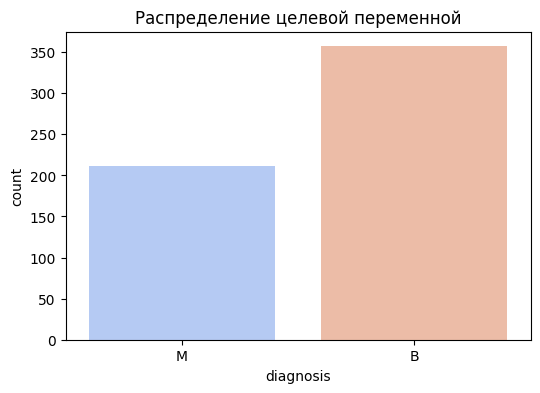

In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.show()

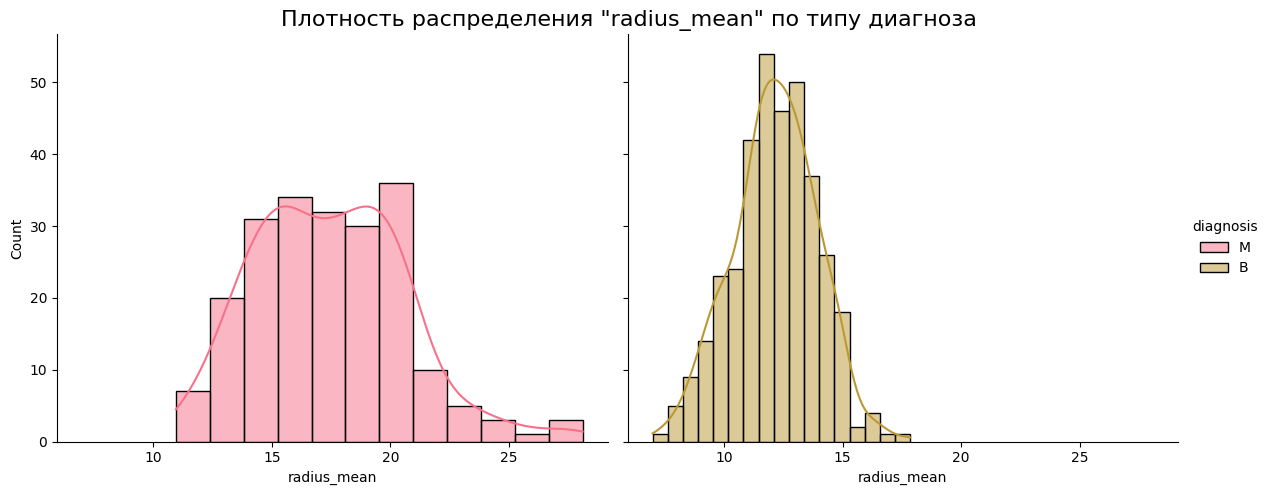

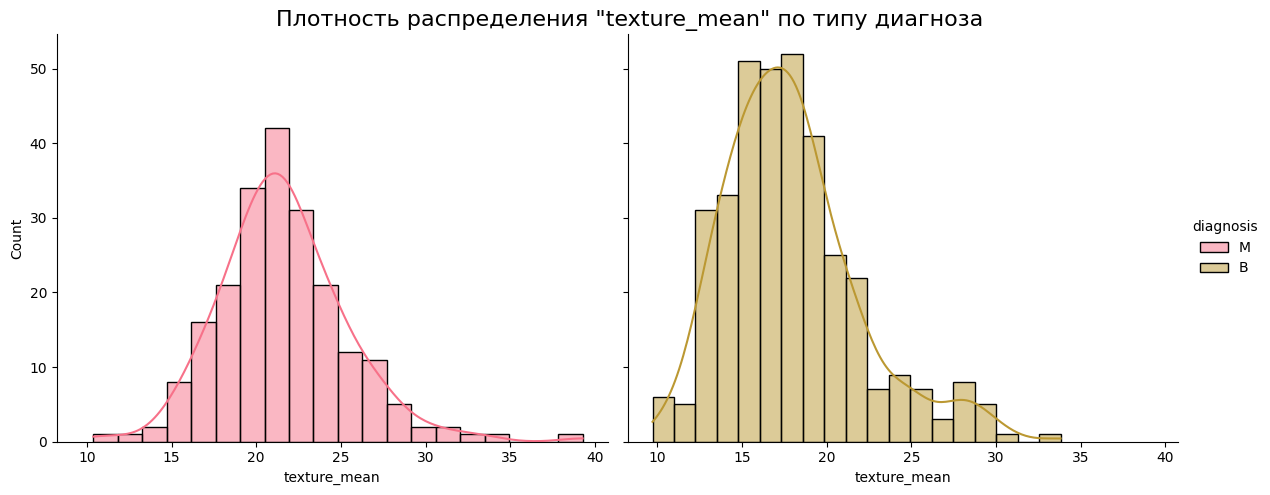

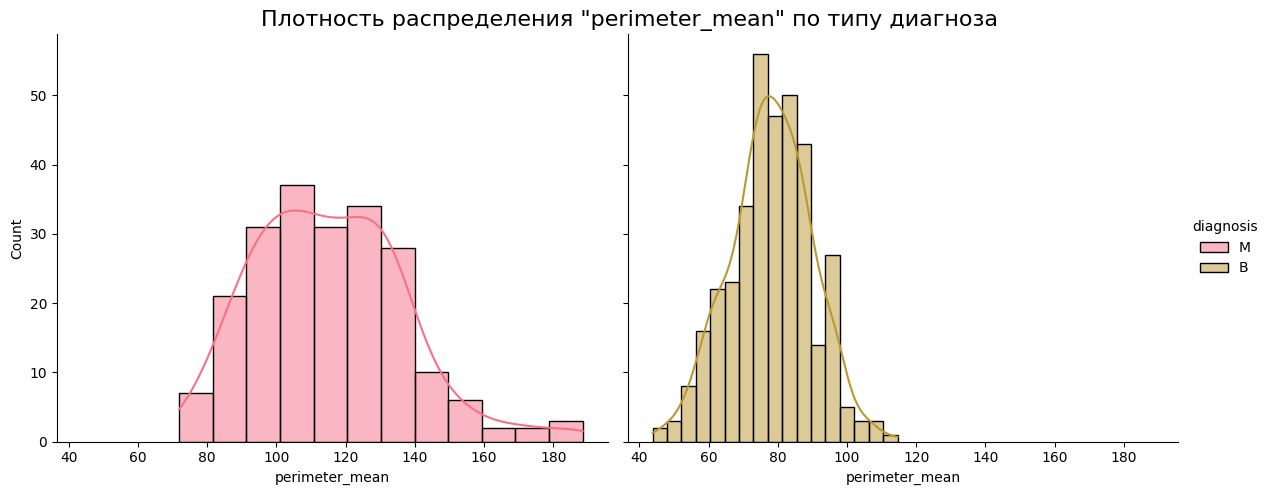

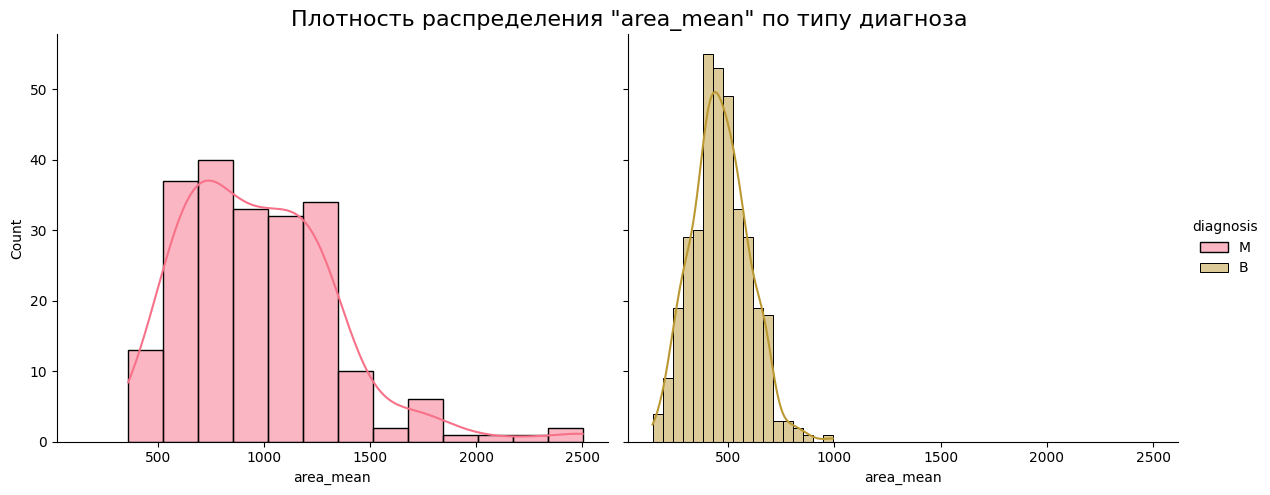

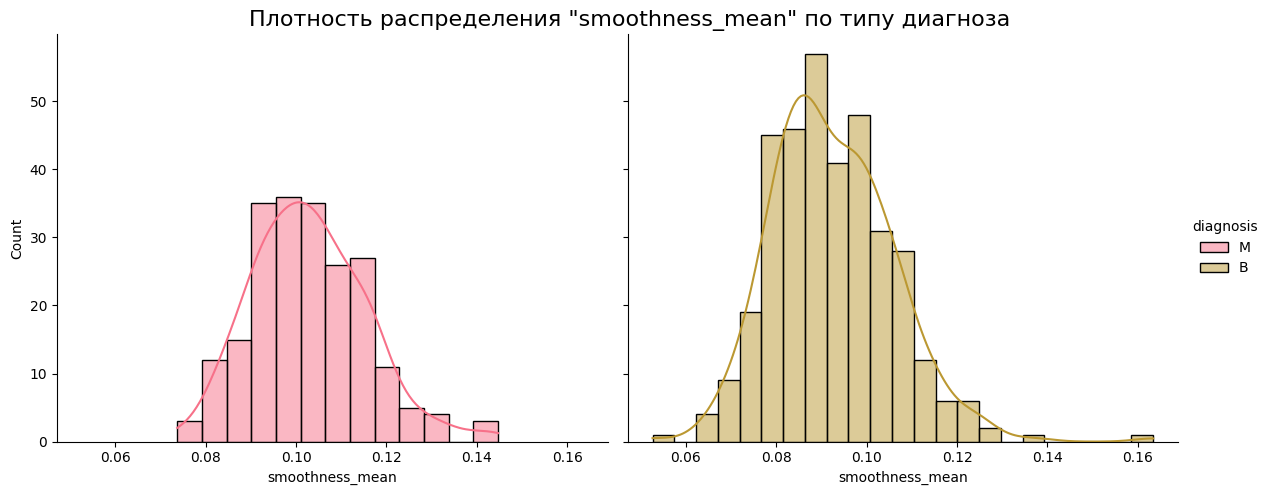

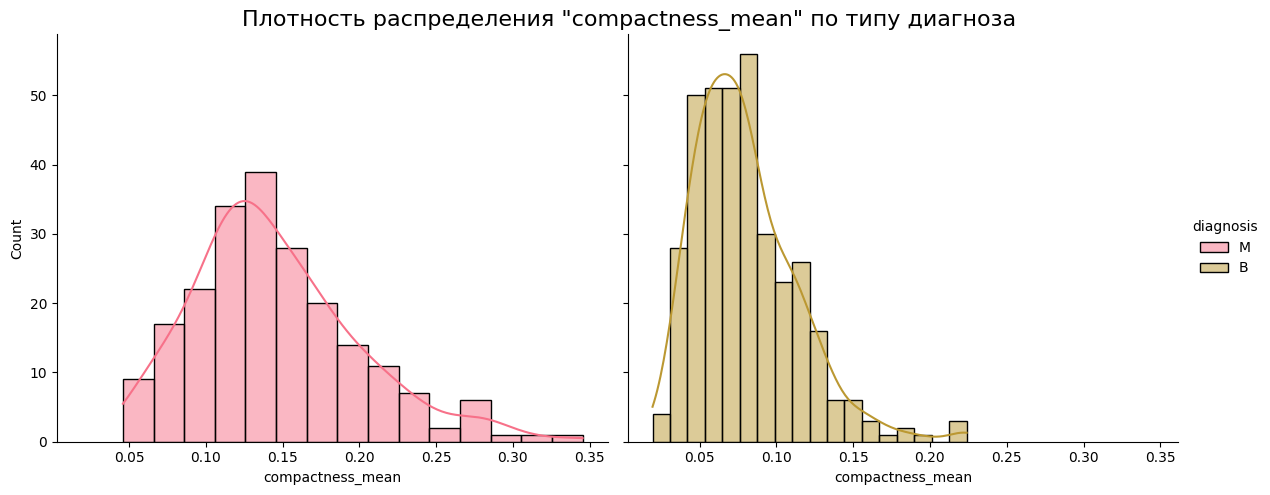

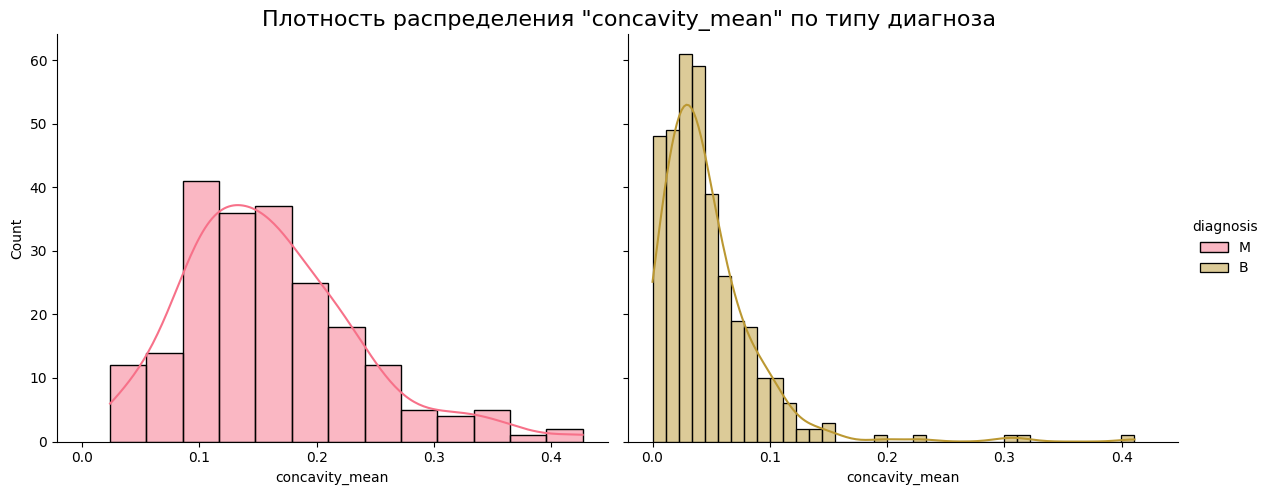

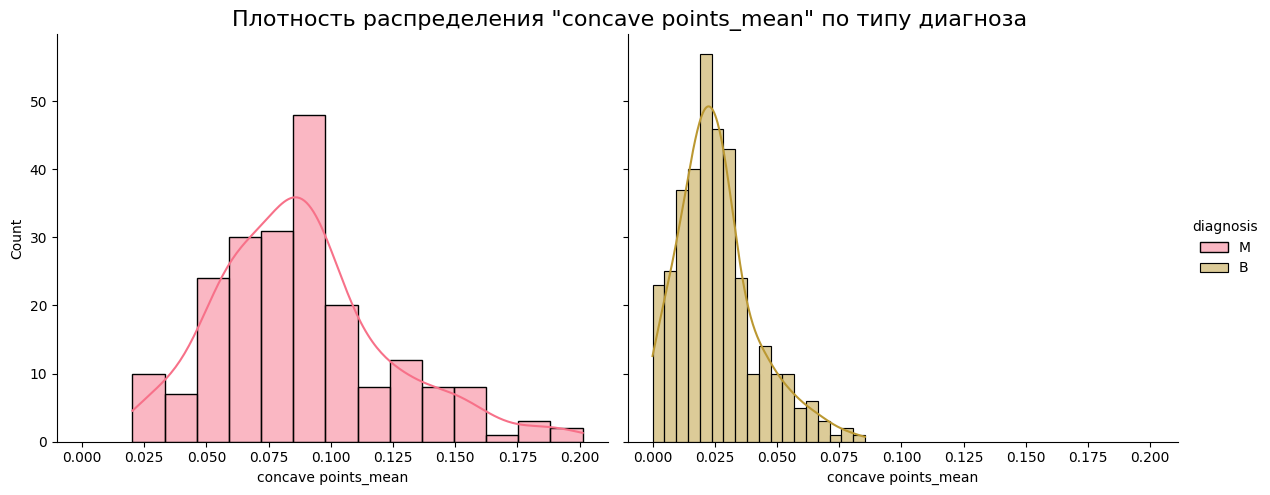

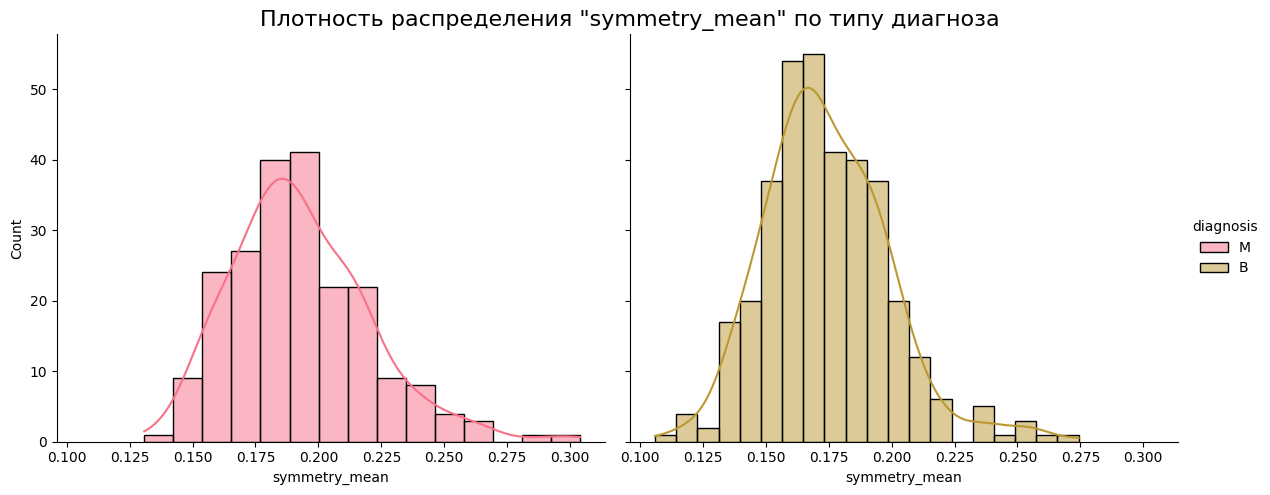

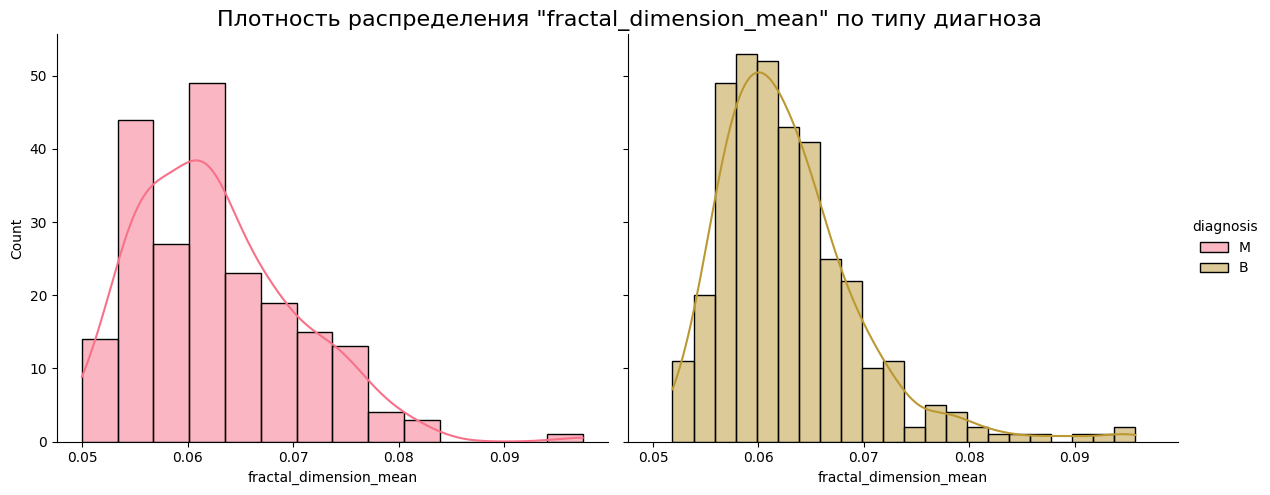

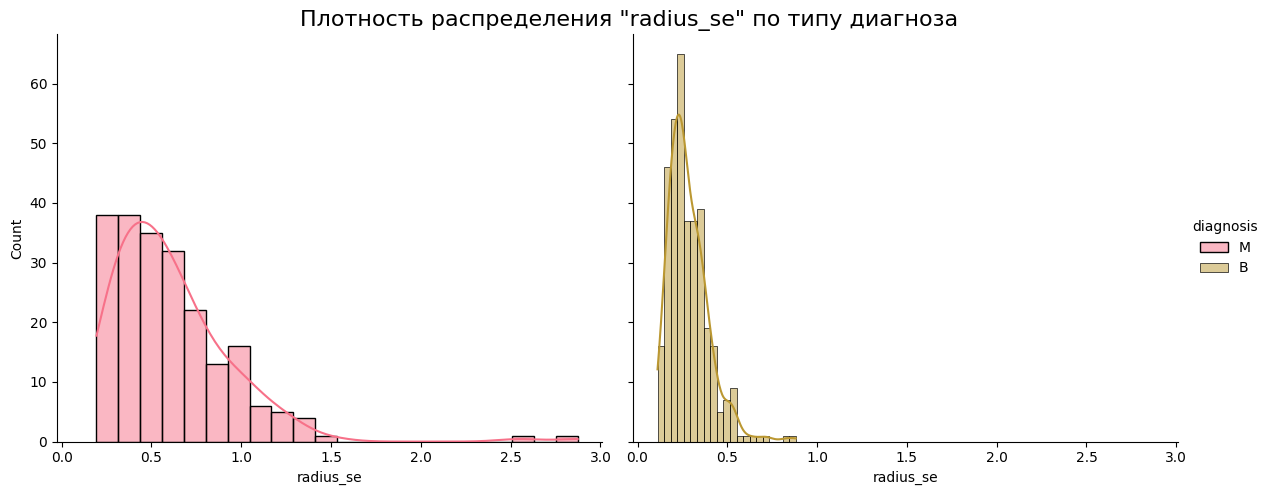

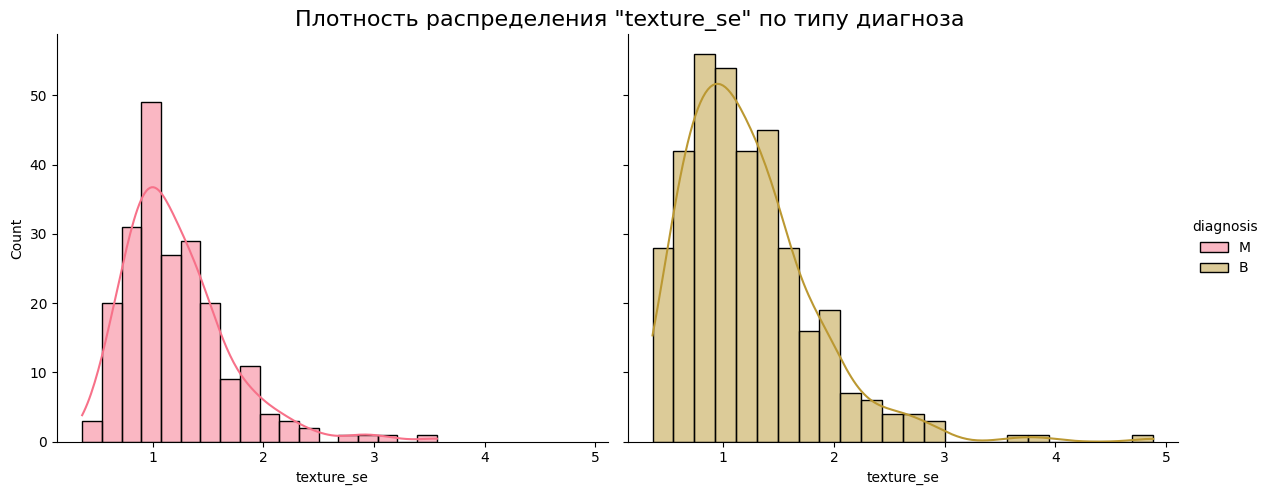

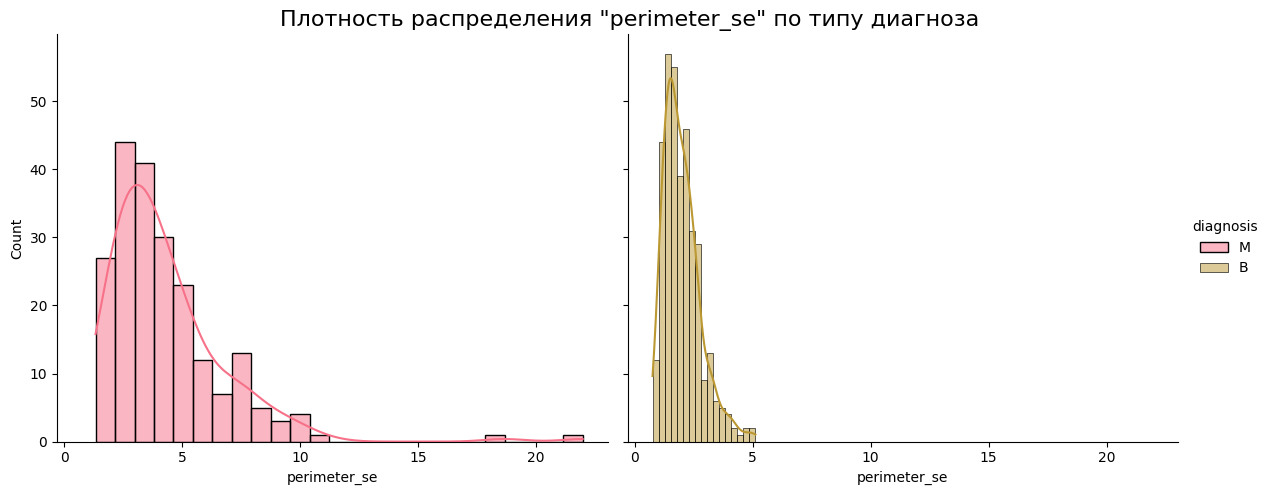

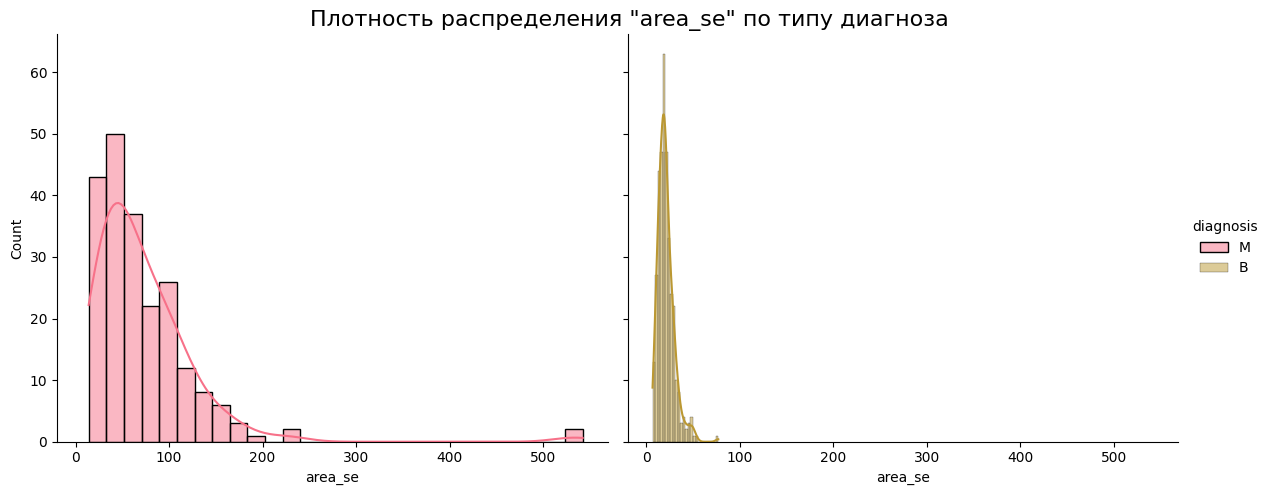

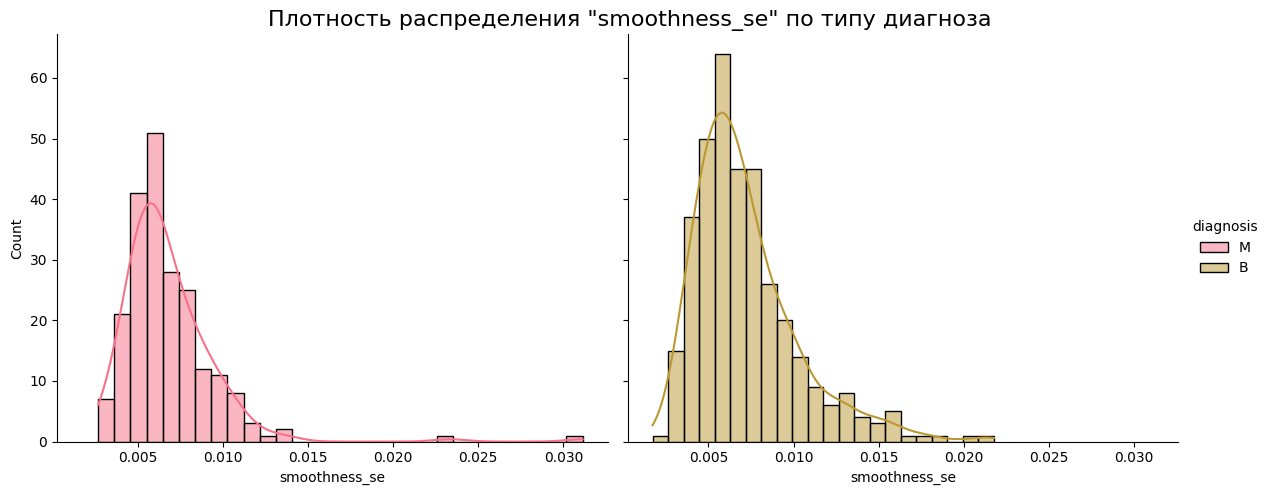

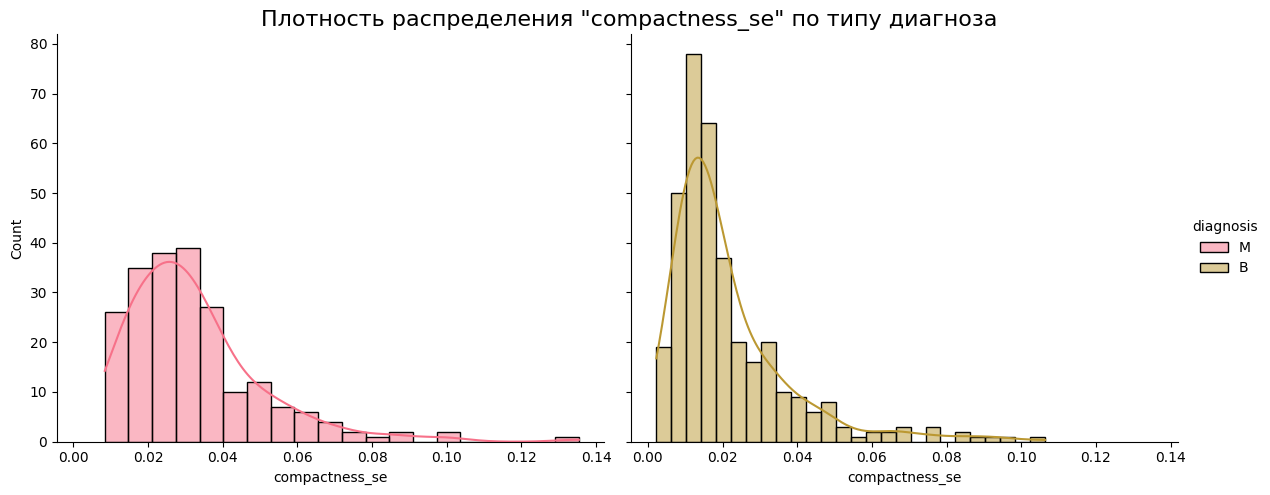

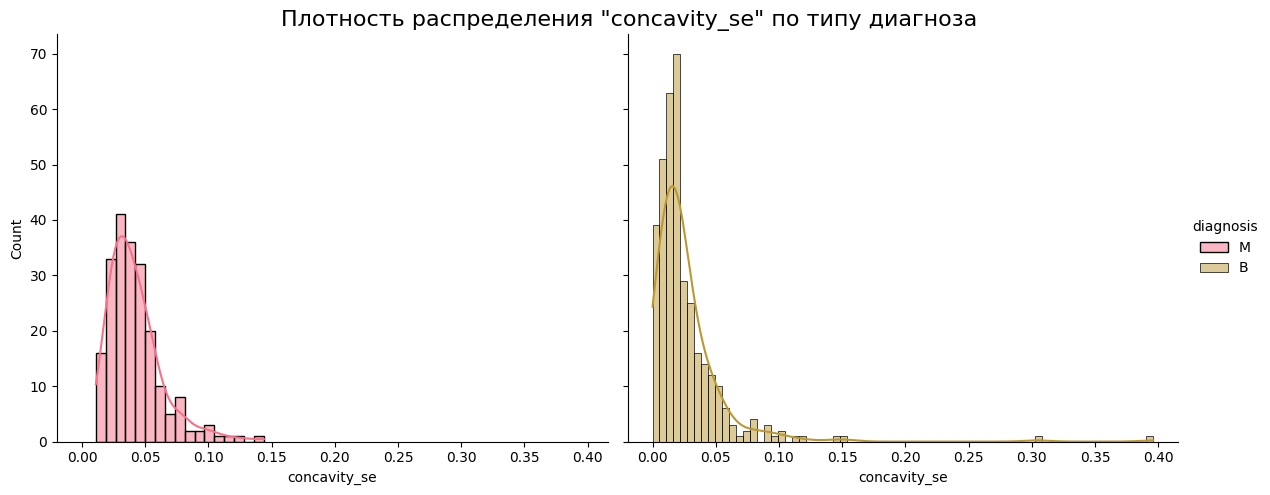

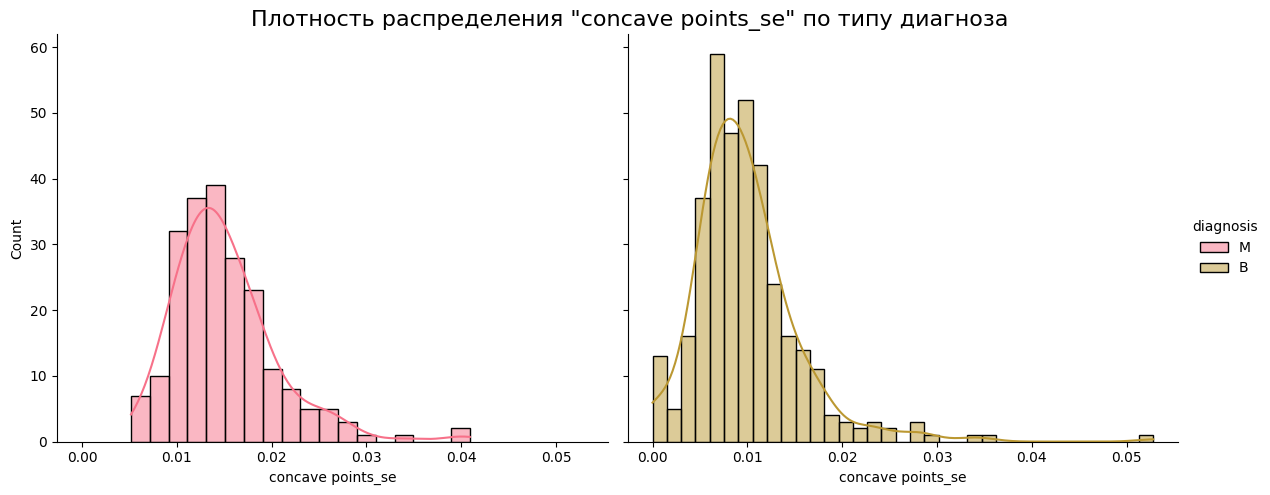

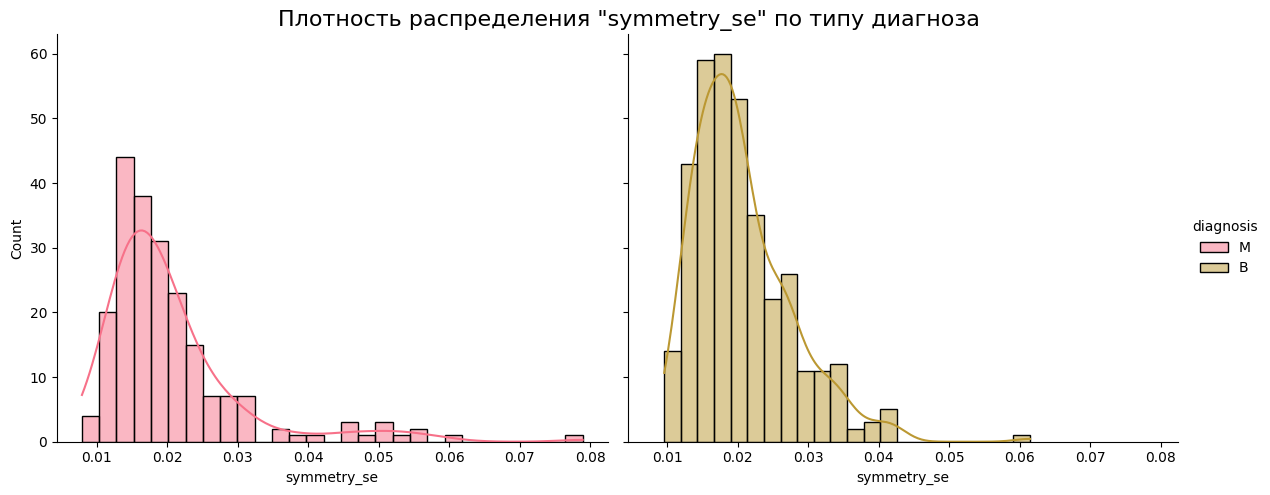

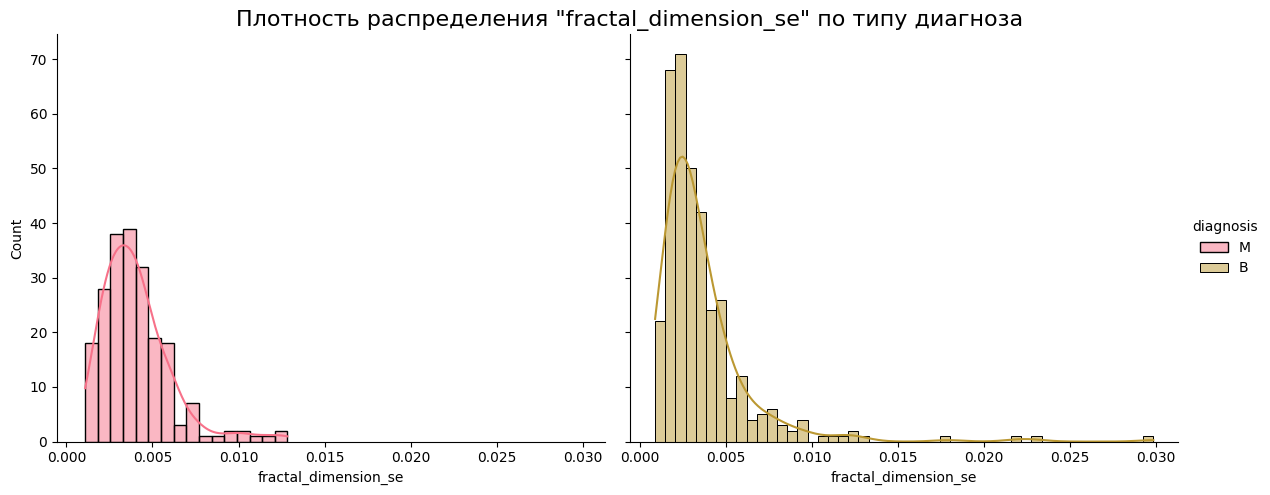

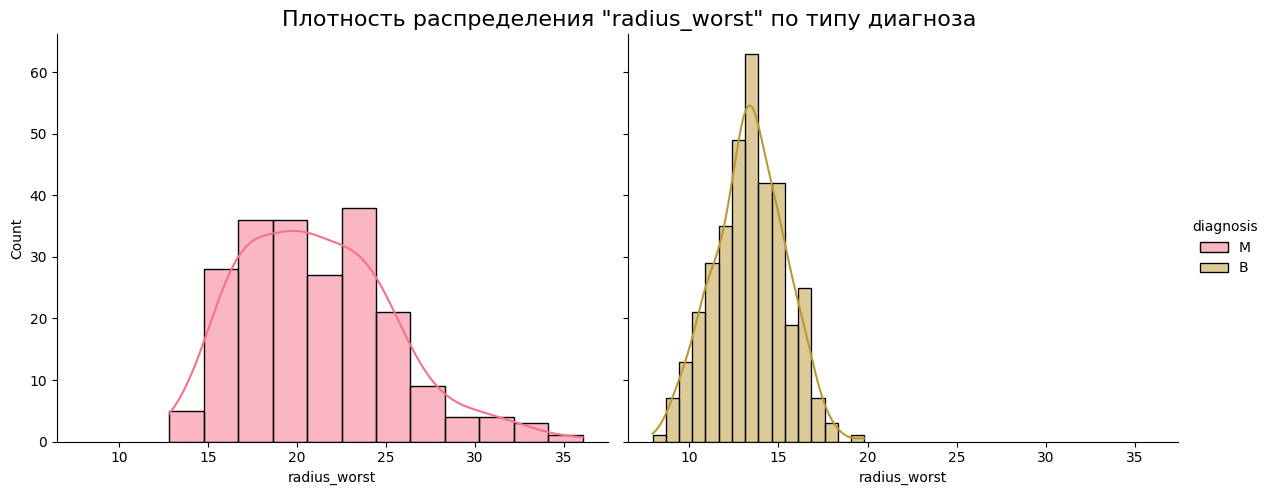

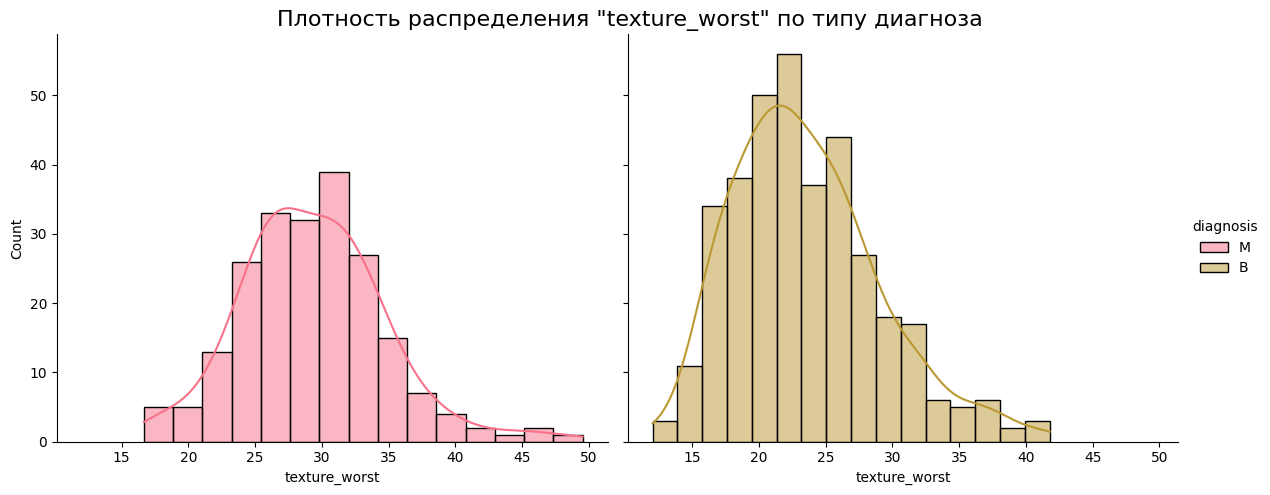

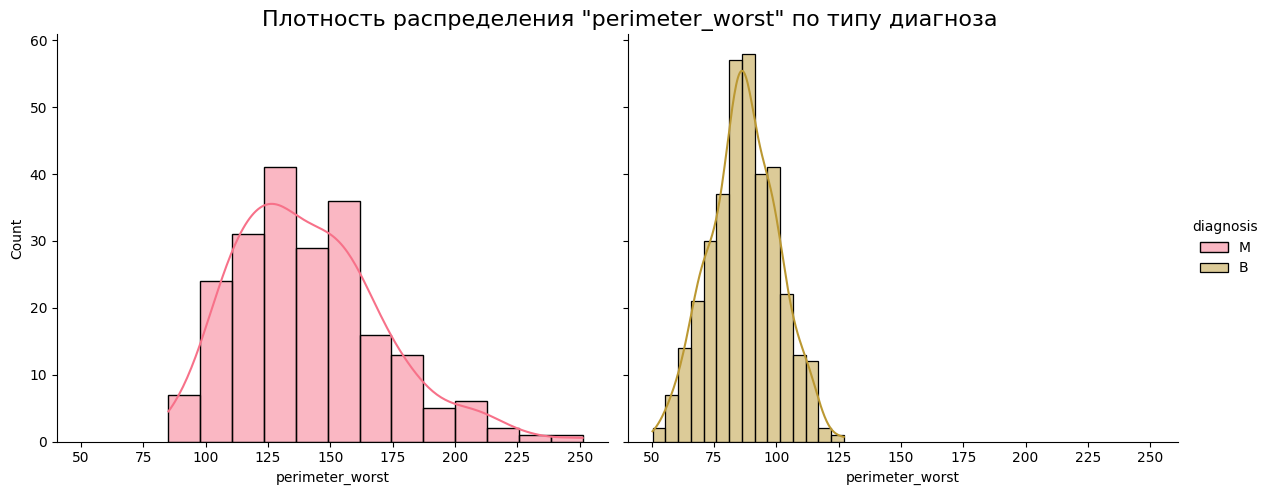

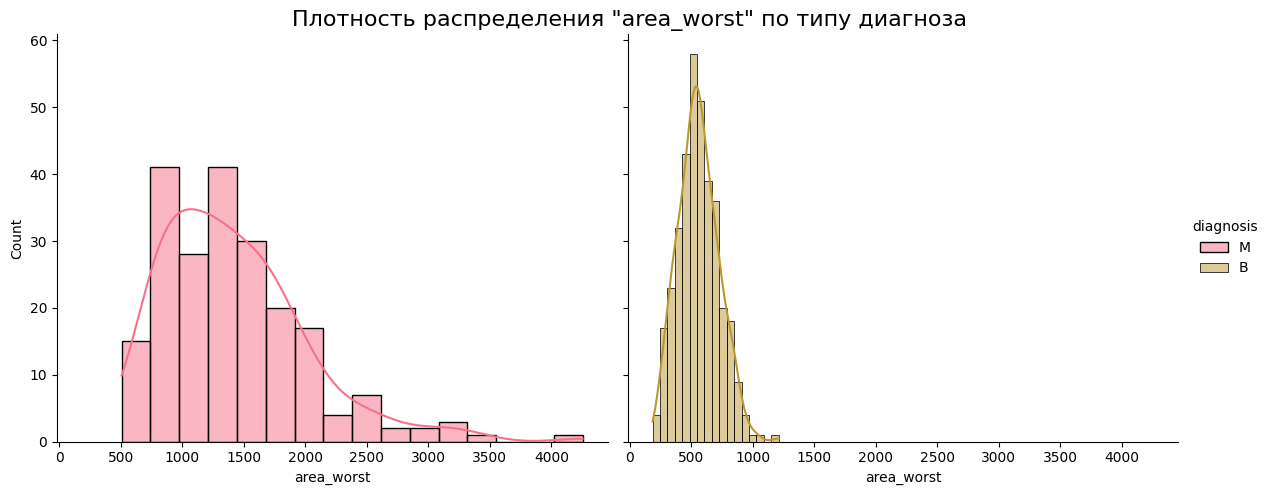

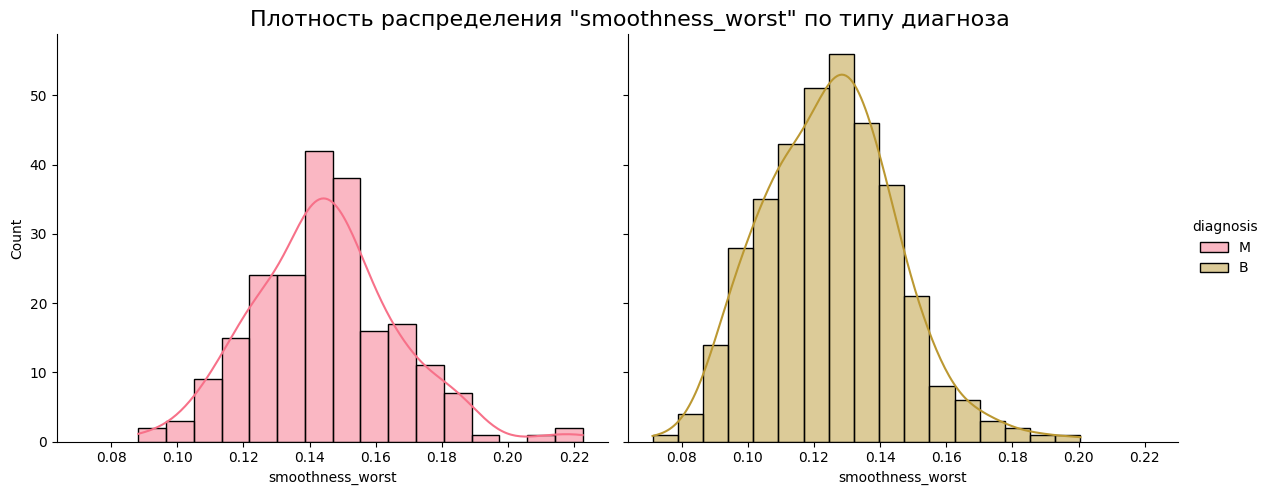

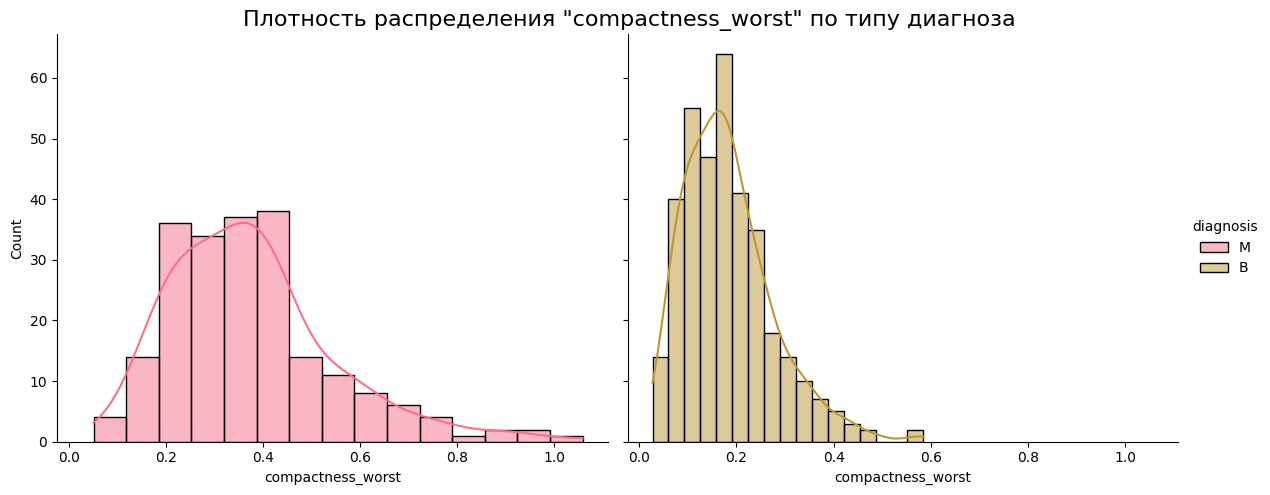

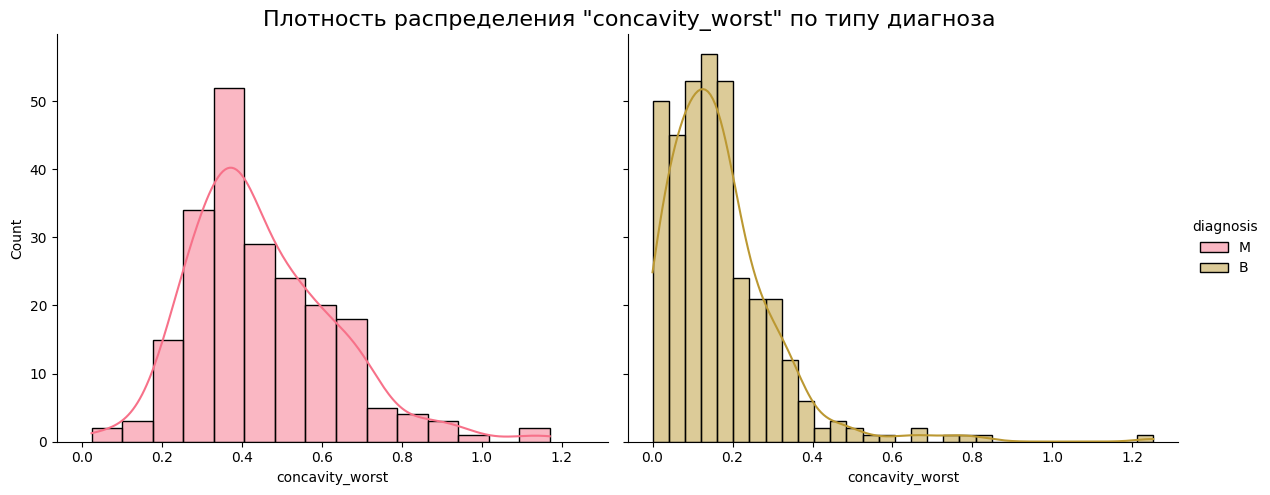

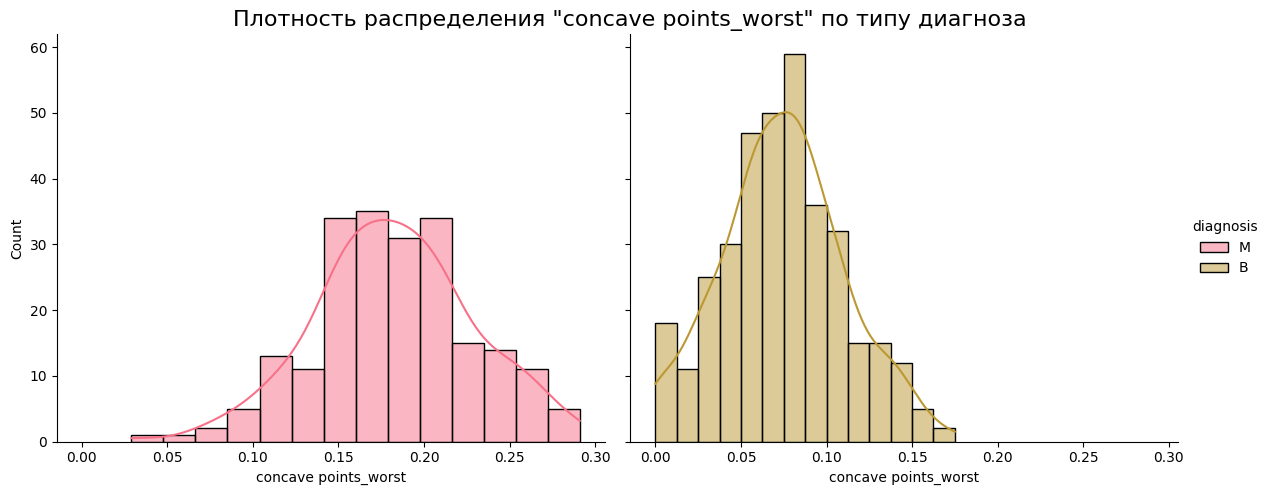

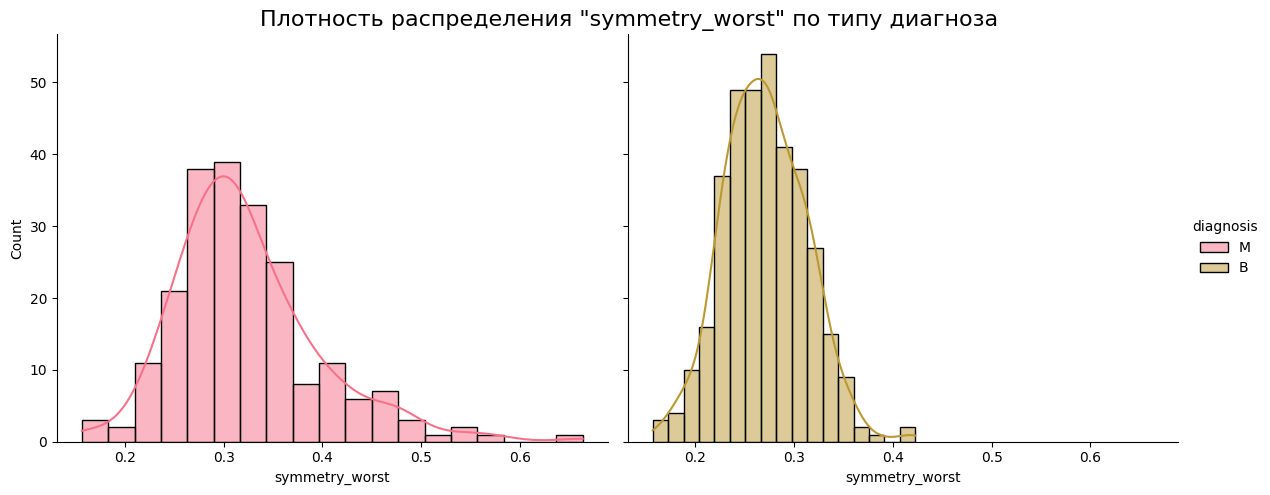

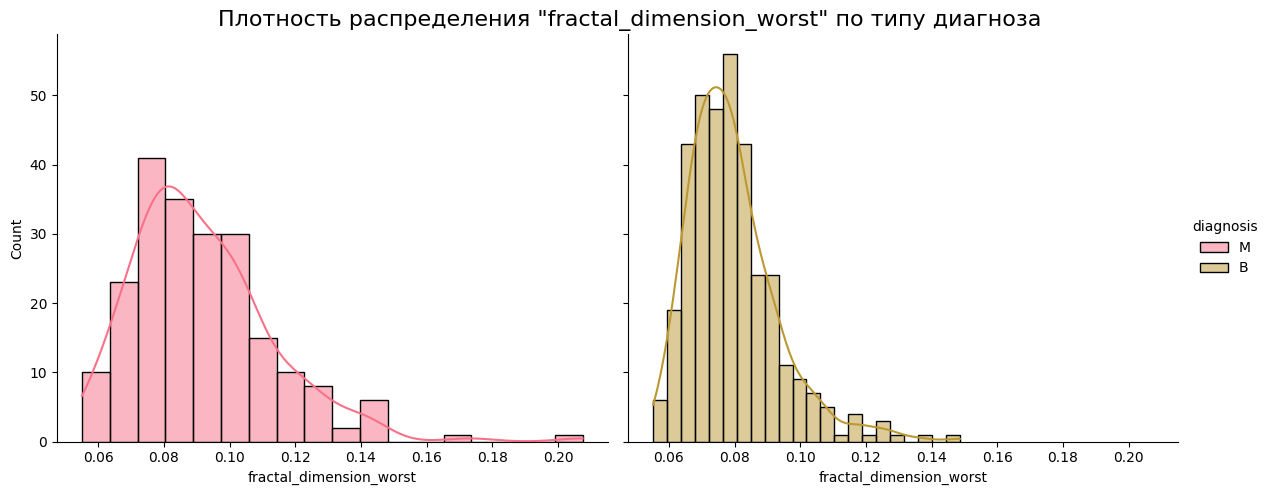

In [89]:
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

for feature in features:
    g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis', height=5, aspect=1.2)
    g.map(sns.histplot, feature, kde=True)
    g.add_legend()
    g.set_titles("")
    g.fig.suptitle(f'Плотность распределения "{feature}" по типу диагноза', fontsize=16)
    plt.show()

Парные графики некоторых параметров

<Figure size 1200x1000 with 0 Axes>

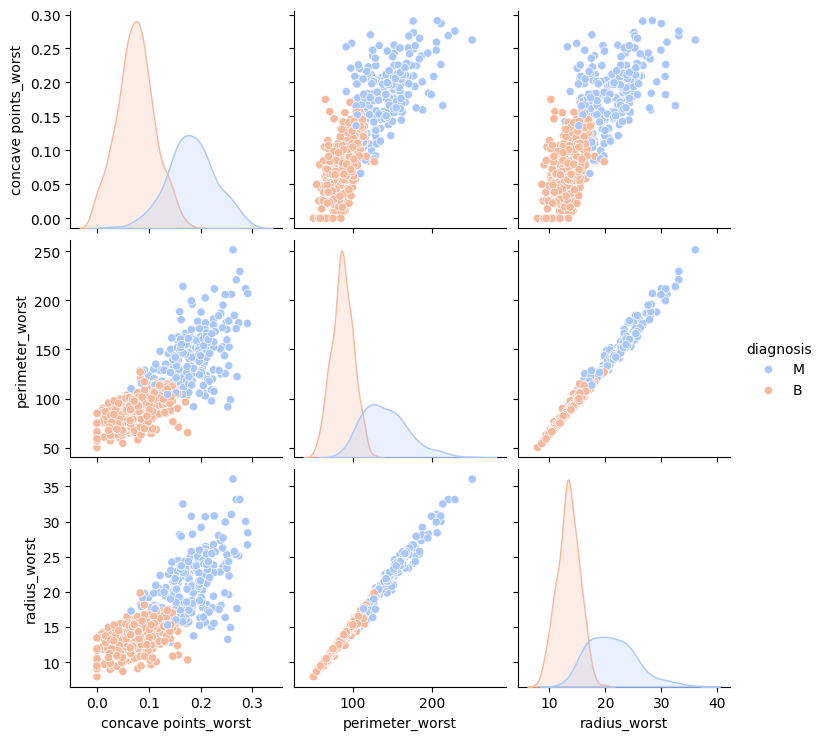

In [90]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[['concave points_worst', 'perimeter_worst', 'radius_worst', 'diagnosis']], hue='diagnosis', palette='coolwarm')
plt.show()

На диаграмме рассеяния между *perimeter_worst* и *radius_worst* видно, что точки расположены вдоль прямой линии с положительным наклоном (сильная корреляция между этими признаками).

На диаграмме рассеяния между *concave points_worst* и *perimeter_worst* (*radius_worst*) видно, что точки расположены более рассеянно (слабая корреляция между этими признаками).

Из графиков видно, что точки с разными диагнозами имеют разные распределения в пространстве признаков.

Корелляционная матрица

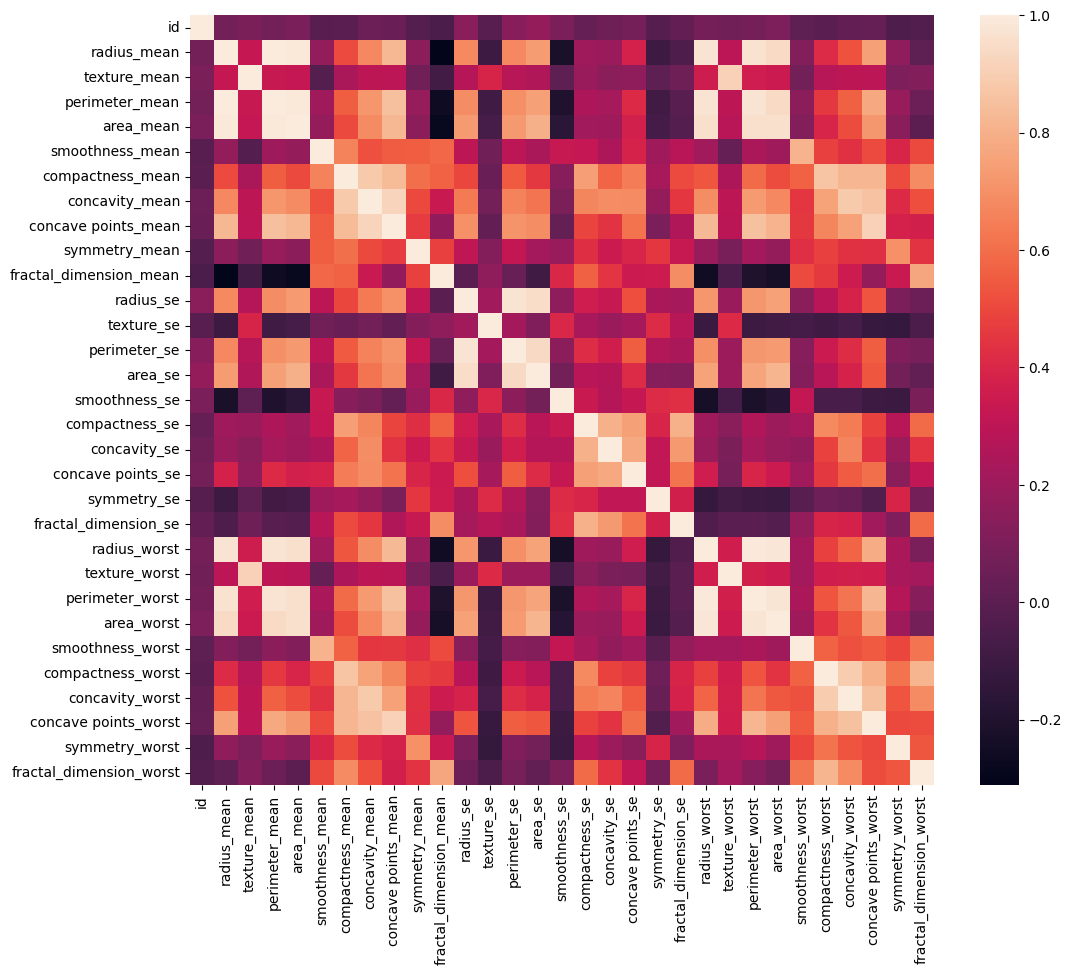

In [91]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True))
plt.show()

Признаки, описывающие размер опухоли (например, *radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst*) сильно коррелируют друг с другом.

Это ожидаемо, поскольку более крупные опухоли чаще всего имеют больший радиус, периметр и площадь.

# Построение модели

Разобьем датасет на:

Y - целевая переменная, которую предсказываем (diagnosis).

X - весь набор данных без целевой переменной.

In [92]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (569, 31) | y shape: (569,) 


Train Test разделение (80/20)

In [93]:
y_mapped = y.map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=17, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.10261223887790934, pvalue=0.9183070084587468, df=567.0)

Обучение и выбор оптимальной модели

Logistic Regression (LR)

Linear Discriminant Analysis (LDA)

K-Nearest Neighbors (KNN)

Classification and Regression Trees (CART)

Gaussian Naive Bayes (NB)

Support Vector Machines (SVM)

In [94]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.923092 (0.045237)
LDA: 0.951691 (0.016277)
KNN: 0.718454 (0.065642)
CART: 0.916715 (0.043191)
NB: 0.626329 (0.019980)
SVC: 0.626329 (0.004106)


По показателям лучшей моделью является Linear Discriminant Analysis (LDA).

Обучение конкретной модели

In [95]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9649122807017544
sk LDA prediction: [1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 1 1 0]
sk transformed features
[[ 6.8871843   8.12372734  7.50084988 13.25868985  7.41363519]]


Точность LDA около 96%

Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

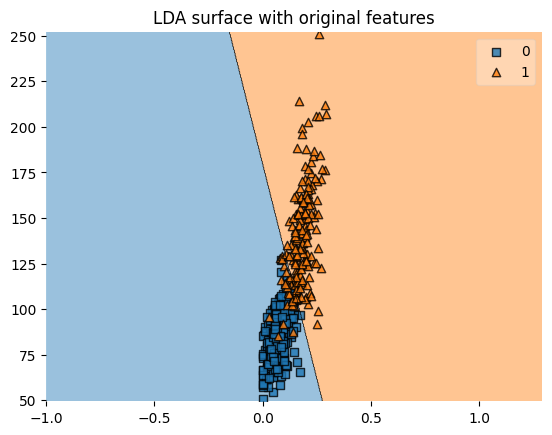

In [96]:
y_s = y_train
X_2d= X_train[['concave points_worst', 'perimeter_worst']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

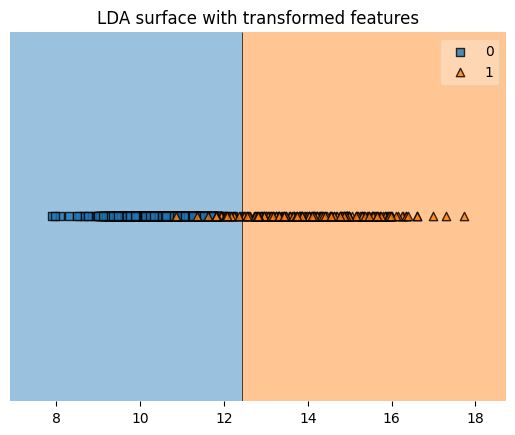

In [97]:
df = data["diagnosis"].map({'B': 0, 'M': 1})

Xs = data[['concave points_worst', 'perimeter_worst']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

Точки, относящиеся к разным классам, разделены границей, хоть и некоторые значения попадают в другой вид опухоли.

In [98]:
predicted = sk_lda2.predict(X1_lda_test)

In [99]:
#Accuracy
accuracy = metrics.accuracy_score(y1_test, predicted)

print("Accuracy:", round(accuracy,2))

#Recall, Precision
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 0.98
Recall (all 1s predicted right): 0.98
Precision (confidence when predicting a 1): 0.98
Detail:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



Значения метрик указывают на то, что обученная модель работает хорошо.